In [2]:
#Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
#Read data from Excel file

df = pd.read_excel("Resources/S&P500.xlsx")
df.head(10)

,Date,Close,Volume,Open,High,Low
0,2023-05-15,4136.28,0,4126.65,4141.25,4110.27
1,2023-05-12,4124.08,0,4138.54,4143.74,4099.12
2,2023-05-11,4130.62,0,4132.24,4132.80,4109.29
3,2023-05-10,4137.64,0,4143.74,4154.28,4098.92
4,2023-05-09,4119.17,0,4124.25,4130.35,4116.65
5,2023-05-08,4138.12,0,4136.98,4142.30,4123.81
6,2023-05-05,4136.25,0,4084.73,4147.02,4084.73
7,2023-05-04,4061.22,0,4082.55,4082.61,4048.28
8,2023-05-03,4090.75,0,4122.25,4148.30,4088.86
9,2023-05-02,4119.58,0,4164.10,4164.10,4089.72


In [4]:
#Date column conversion to datetime format

df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%d")

In [5]:
#Defining training data and target values

x = df[["Close", "Volume", "Open", "High", "Low"]]
y = df["Date"]

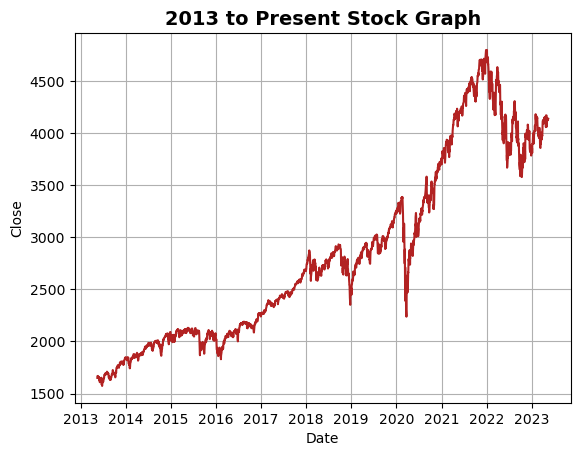

In [6]:
#2013 to present stock graph plot

sns.lineplot(x = "Date", y = "Close", data = df, color = "firebrick")
plt.title("2013 to Present Stock Graph", fontweight = "bold", fontsize = 14)
plt.grid()

plt.show()

In [7]:
#Fitting linear regression into training data

regression = LinearRegression().fit(x, y)

In [8]:
#Five year stock prediction

future_dates = pd.date_range(start = df["Date"].iloc[-1], periods = 5, freq = "Y")

future_x = pd.DataFrame(columns = ["Close", "Volume", "Open", "High", "Low"])
future_df = pd.DataFrame(index = future_dates, columns = ["Close"])

for date in future_dates:
    if future_x.empty:
        future_x.loc[date, :] = x.iloc[-1, :].values   
    else:
        predictor_values = future_x.iloc[-1, :].values.reshape(1, -1)
        
future_close = regression.predict(predictor_values)[0]        
future_x.loc[date, :] = [future_close, 0, 0, 0, 0]
future_df.loc[date, "Close"] = future_close

/Users/alexdelao/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


/var/folders/cp/27d17d3d0fvc2wz4k1m4j2740000gn/T/ipykernel_58954/4212867213.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(future_years)


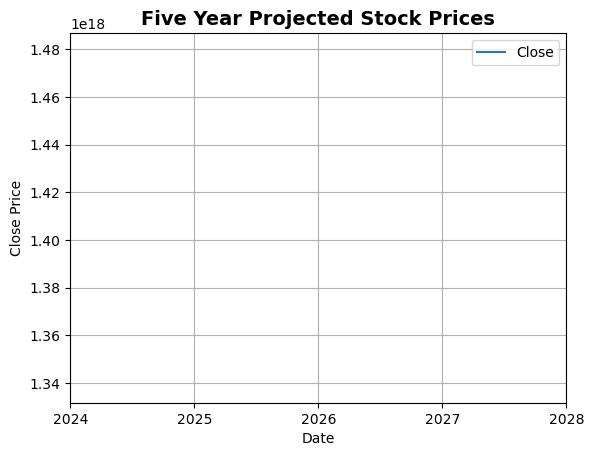

In [12]:
#Line plot showing projected future stock prices

ax = future_df.plot.line() 
ax.set_title("Five Year Projected Stock Prices", fontweight = "bold", fontsize = 14) 
ax.set_xlabel("Date") 
ax.set_ylabel("Close Price") 
future_years = ['2024', '2025', '2026', '2027', '2028'] 
ax.set_xticklabels(future_years) 
plt.grid()

plt.show()